In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load CSV file
df = pd.read_csv('fetch_fred_data.csv')
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df = df[df['date'] >= '2004-01-01']
df = df.reset_index().set_index('date').drop(columns = 'index')

df

,GDP,Real Consumer Exp,Business Inv,Govt Expenditure,Net Exports,Imports,Exports,CPI,Real Disposable Income,Unemployment Rate,...,PPI Food Manufacture,PPI Grocery,Retail Wages,US Population,CPI (Food at Home),CPI (Food away from Home),Grocery Sales,Restaurant Sales,Grocery Units,Restaurant Units
date,,,,,,,,,,,,,,,,,,,,,
2004-01-01,15248.68,NaN,288.018,3947.702,-621.175,2044.535,1339.286,186.300,11051.2,5.7,...,139.300,121.300,NaN,292046.0,183.300,184.900,36402.0,24839.0,198.592471,134.337480
2004-02-01,15248.68,NaN,288.018,3947.702,-621.175,2044.535,1339.286,186.700,11071.0,5.6,...,140.400,125.700,NaN,292230.0,183.700,185.500,35890.0,24952.0,195.372891,134.512129
2004-03-01,15248.68,NaN,288.018,3947.702,-621.175,2044.535,1339.286,187.100,11115.6,5.8,...,142.400,125.200,NaN,292434.0,184.100,185.800,36365.0,27054.0,197.528517,145.608181
2004-04-01,15366.85,NaN,345.442,3982.852,-670.333,2044.535,1367.358,187.400,11153.3,5.6,...,146.100,123.100,NaN,292651.0,184.300,186.200,36312.0,26738.0,197.026587,143.598281
2004-05-01,15366.85,NaN,345.442,3982.852,-670.333,2044.535,1367.358,188.200,11208.9,5.6,...,149.100,122.200,NaN,292872.0,186.600,186.700,36528.0,27839.0,195.755627,149.110873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-01,NaN,16357.7,NaN,NaN,NaN,NaN,NaN,317.603,17605.8,4.1,...,262.051,276.134,24.86,341320.0,309.754,374.644,75998.0,86965.0,245.349535,232.127033
2025-01-01,NaN,16257.6,NaN,NaN,NaN,NaN,NaN,319.086,17661.4,4.0,...,262.949,291.471,24.97,341454.0,311.178,375.532,76101.0,80594.0,244.557777,214.612869
2025-02-01,NaN,16274.2,NaN,NaN,NaN,NaN,NaN,319.775,17756.2,4.1,...,266.500,293.162,25.01,341588.0,311.203,376.991,76257.0,78855.0,245.039412,209.169450


In [4]:
df = df.rename(columns={
       "GDP": 'gdp',
        'Real Consumer Exp': 'cons_exp',
        'Business Inv': "bus_inv",
        'Govt Expenditure': 'govt_exp',
        'Net Exports': 'net_exp',
        'Imports': 'imports',
        'Exports': 'exports',
        'CPI': 'cpi',
        "Real Disposable Income": 'rdi',
        "Unemployment Rate": 'unrate',
        "Initial Jobless Claims": 'initial_claims',
        "Continued Jobless Claims": 'continued_claims',
        "Personal Savings": 'savings',
        "Consumer Debt % DI": 'cons_debt_di',
        "Credit Card Delinquency": 'credit_card_delinq',
        "Mortgage Delinquency": 'mortgage_delinq',
        "Consumer Sentiment": 'cons_sent',
        "Avg Home Price": 'home_price',        
        "US Population": 'us_population',
        "Oil Prices": 'oil_prices',        
        "PPI Farm Products": 'ppi_farm_products',
        "PPI Food Manufacture": 'ppi_food_mfg',
        "PPI Grocery": 'ppi_grocery',
        "Retail Wages": 'wages_retail',
        "Grocery Sales": 'grocery_sales',  
        "Restaurant Sales": 'restaurant_sales',    
        "CPI (Food at Home)": 'cpi_fah', 
        "CPI (Food away from Home)": 'cpi_fafh',
        "Grocery Units": "grocery_units",
        "Restaurant Units": "restaurant_units"
    })


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 256 entries, 2004-01-01 to 2025-04-01
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gdp                 250 non-null    float64
 1   cons_exp            218 non-null    float64
 2   bus_inv             250 non-null    float64
 3   govt_exp            250 non-null    float64
 4   net_exp             250 non-null    float64
 5   imports             241 non-null    float64
 6   exports             250 non-null    float64
 7   cpi                 255 non-null    float64
 8   rdi                 254 non-null    float64
 9   unrate              255 non-null    float64
 10  initial_claims      256 non-null    int64  
 11  continued_claims    256 non-null    int64  
 12  savings             254 non-null    float64
 13  cons_debt_di        250 non-null    float64
 14  credit_card_delinq  250 non-null    float64
 15  mortgage_delinq     250 non-null    fl

In [6]:
rdi = pd.read_excel('RDI Analysis.xlsx')
rdi = rdi.set_index('observation_date')
rdi = rdi[['RDI_adj']]
rdi = rdi.rename(columns={'RDI_adj':'rdi_adj'})
rdi = rdi[(rdi.index >= '2004-01-01') & (rdi.index <= '2025-01-31')]
rdi

,rdi_adj
observation_date,
2004-01-01,11051.2
2004-02-01,11071.0
2004-03-01,11115.6
2004-04-01,11153.3
2004-05-01,11208.9
...,...
2024-09-01,17519.6
2024-10-01,17568.5
2024-11-01,17592.4


In [7]:
df = pd.merge(df, rdi, left_index=True, right_index=True, how='left')
df['grocery_sales_lag1'] = df['grocery_sales'].shift(1)
df

,gdp,cons_exp,bus_inv,govt_exp,net_exp,imports,exports,cpi,rdi,unrate,...,wages_retail,us_population,cpi_fah,cpi_fafh,grocery_sales,restaurant_sales,grocery_units,restaurant_units,rdi_adj,grocery_sales_lag1
date,,,,,,,,,,,,,,,,,,,,,
2004-01-01,15248.68,NaN,288.018,3947.702,-621.175,2044.535,1339.286,186.300,11051.2,5.7,...,NaN,292046.0,183.300,184.900,36402.0,24839.0,198.592471,134.337480,11051.2,NaN
2004-02-01,15248.68,NaN,288.018,3947.702,-621.175,2044.535,1339.286,186.700,11071.0,5.6,...,NaN,292230.0,183.700,185.500,35890.0,24952.0,195.372891,134.512129,11071.0,36402.0
2004-03-01,15248.68,NaN,288.018,3947.702,-621.175,2044.535,1339.286,187.100,11115.6,5.8,...,NaN,292434.0,184.100,185.800,36365.0,27054.0,197.528517,145.608181,11115.6,35890.0
2004-04-01,15366.85,NaN,345.442,3982.852,-670.333,2044.535,1367.358,187.400,11153.3,5.6,...,NaN,292651.0,184.300,186.200,36312.0,26738.0,197.026587,143.598281,11153.3,36365.0
2004-05-01,15366.85,NaN,345.442,3982.852,-670.333,2044.535,1367.358,188.200,11208.9,5.6,...,NaN,292872.0,186.600,186.700,36528.0,27839.0,195.755627,149.110873,11208.9,36312.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-01,NaN,16357.7,NaN,NaN,NaN,NaN,NaN,317.603,17605.8,4.1,...,24.86,341320.0,309.754,374.644,75998.0,86965.0,245.349535,232.127033,17605.8,75235.0
2025-01-01,NaN,16257.6,NaN,NaN,NaN,NaN,NaN,319.086,17661.4,4.0,...,24.97,341454.0,311.178,375.532,76101.0,80594.0,244.557777,214.612869,17661.4,75998.0
2025-02-01,NaN,16274.2,NaN,NaN,NaN,NaN,NaN,319.775,17756.2,4.1,...,25.01,341588.0,311.203,376.991,76257.0,78855.0,245.039412,209.169450,NaN,76101.0


### Describe the Data ###

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 256 entries, 2004-01-01 to 2025-04-01
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gdp                 250 non-null    float64
 1   cons_exp            218 non-null    float64
 2   bus_inv             250 non-null    float64
 3   govt_exp            250 non-null    float64
 4   net_exp             250 non-null    float64
 5   imports             241 non-null    float64
 6   exports             250 non-null    float64
 7   cpi                 255 non-null    float64
 8   rdi                 254 non-null    float64
 9   unrate              255 non-null    float64
 10  initial_claims      256 non-null    int64  
 11  continued_claims    256 non-null    int64  
 12  savings             254 non-null    float64
 13  cons_debt_di        250 non-null    float64
 14  credit_card_delinq  250 non-null    float64
 15  mortgage_delinq     250 non-null    fl

In [9]:
print(df.index)

DatetimeIndex(['2004-01-01', '2004-02-01', '2004-03-01', '2004-04-01',
               '2004-05-01', '2004-06-01', '2004-07-01', '2004-08-01',
               '2004-09-01', '2004-10-01',
               ...
               '2024-07-01', '2024-08-01', '2024-09-01', '2024-10-01',
               '2024-11-01', '2024-12-01', '2025-01-01', '2025-02-01',
               '2025-03-01', '2025-04-01'],
              dtype='datetime64[ns]', name='date', length=256, freq=None)


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gdp,250.0,1.869289e+04,2.278624e+03,1.524868e+04,1.675977e+04,1.818591e+04,2.054879e+04,2.354235e+04
cons_exp,218.0,1.303484e+04,1.608874e+03,1.106800e+04,1.153705e+04,1.276625e+04,1.406695e+04,1.635770e+04
bus_inv,250.0,5.010356e+02,2.318096e+02,-1.471210e+02,3.932990e+02,5.039140e+02,6.384730e+02,9.433440e+02
govt_exp,250.0,6.597726e+03,1.846293e+03,3.947702e+03,5.560375e+03,5.972949e+03,7.393724e+03,1.118667e+04
net_exp,250.0,-5.977726e+02,2.276290e+02,-1.132084e+03,-7.138420e+02,-5.579370e+02,-3.883352e+02,-2.755520e+02
imports,241.0,2.662404e+03,4.341877e+02,2.031762e+03,2.325403e+03,2.623351e+03,3.049962e+03,3.640014e+03
exports,250.0,2.099427e+03,3.570417e+02,1.339286e+03,1.816114e+03,2.230209e+03,2.381788e+03,2.638199e+03
cpi,255.0,2.406942e+02,3.442889e+01,1.863000e+02,2.161850e+02,2.362520e+02,2.567360e+02,3.197750e+02
rdi,254.0,1.401597e+04,2.036385e+03,1.105120e+04,1.227495e+04,1.346610e+04,1.570305e+04,2.044580e+04
unrate,255.0,5.785098e+00,2.084479e+00,3.400000e+00,4.200000e+00,5.000000e+00,7.200000e+00,1.480000e+01


### Missing Values, Duplicates, and Outliers ###

In [11]:
# Count total missing values per column
missing_counts = df.isna().sum()

# Show only columns with missing values
missing_counts = missing_counts[missing_counts > 0]

missing_counts

gdp                    6
cons_exp              38
bus_inv                6
govt_exp               6
net_exp                6
imports               15
exports                6
cpi                    1
rdi                    2
unrate                 1
savings                2
cons_debt_di           6
credit_card_delinq     6
mortgage_delinq        6
cons_sent              2
home_price             3
ppi_farm_products      1
ppi_food_mfg           1
ppi_grocery            1
wages_retail          27
us_population          2
cpi_fah                1
cpi_fafh               1
grocery_sales          1
restaurant_sales       2
grocery_units          1
restaurant_units       2
rdi_adj                3
grocery_sales_lag1     1
dtype: int64

In [12]:
#fill in missing values
df = df.ffill()
df['grocery_sales_lag1'] = df['grocery_sales_lag1'].bfill()

In [13]:
# Count total missing values per column
missing_counts = df.isna().sum()

# Show only columns with missing values
missing_counts = missing_counts[missing_counts > 0]

missing_counts

cons_exp        36
wages_retail    26
dtype: int64

In [14]:
# Check for duplicates
df.duplicated().sum()

0

In [15]:
# Identify outliers using IQR
cols = df.columns.tolist()

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)

IQR = Q3 - Q1

lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR

IQR_df = pd.DataFrame(
    {'Column': Q1.index,                        # Column names
    'Q1 (25th percentile)': Q1.values,          # Q1 values
    'Q3 (75th percentile)': Q3.values,          # Q3 values
    'IQR': IQR.values,                          # Interquartile range
    'Lower Whisker': lower_whisker.values,      # Lower whisker
    'Upper Whisker': upper_whisker.values})      # Upper whisker

#This provides the percent of values above or below the whiskers
((df[cols] < lower_whisker) | (df[cols] > upper_whisker)).sum() / len(df) * 100

gdp                    0.000000
cons_exp               0.000000
bus_inv                5.859375
govt_exp               6.250000
net_exp                0.000000
imports                0.000000
exports                0.000000
cpi                    1.562500
rdi                    0.000000
unrate                 0.781250
initial_claims         7.031250
continued_claims       6.250000
savings                7.031250
cons_debt_di           0.000000
credit_card_delinq     3.515625
mortgage_delinq        0.000000
cons_sent              0.000000
home_price            13.281250
oil_prices             0.000000
ppi_farm_products      0.000000
ppi_food_mfg           7.421875
ppi_grocery            0.000000
wages_retail           0.000000
us_population          0.000000
cpi_fah               13.671875
cpi_fafh               0.000000
grocery_sales          0.000000
restaurant_sales       0.781250
grocery_units          0.390625
restaurant_units       0.000000
rdi_adj                0.000000
grocery_

### Visualizations ###

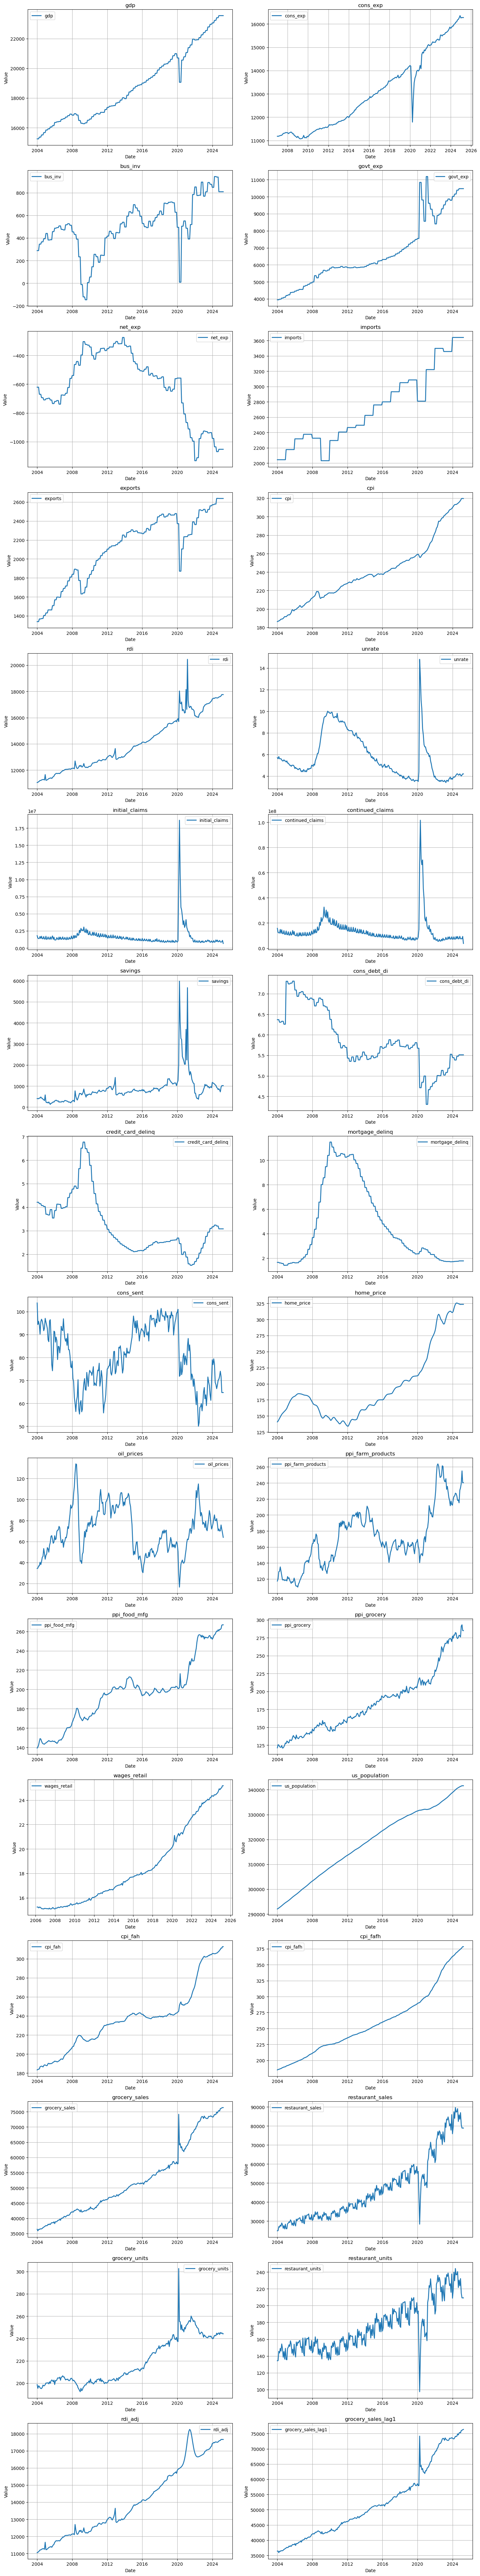

In [16]:
# Select the variables to plot (excluding 'date')
var_list = df.columns.tolist()

# Create a grid of subplots (2 columns × enough rows for all variables)
num_vars = len(var_list)
rows = (num_vars // 2) + (num_vars % 2)  # Ensures enough rows for all variables

fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(15, 5 * rows))  # Dynamically sized

# Flatten axes array for easier iteration
axes = axes.flatten()

# Loop through each variable and plot
for i, col in enumerate(var_list):
    ax = axes[i]  # Select the subplot
    ax.plot(df.index, df[col], label=col, linewidth=2)
    
    # Customize the subplot
    ax.set_title(col, fontsize=12)
    ax.set_xlabel("Date", fontsize=10)
    ax.set_ylabel("Value", fontsize=10)
    ax.grid(True)
    ax.legend()

# Adjust layout for readability
plt.tight_layout()

# Show the plot
plt.show()


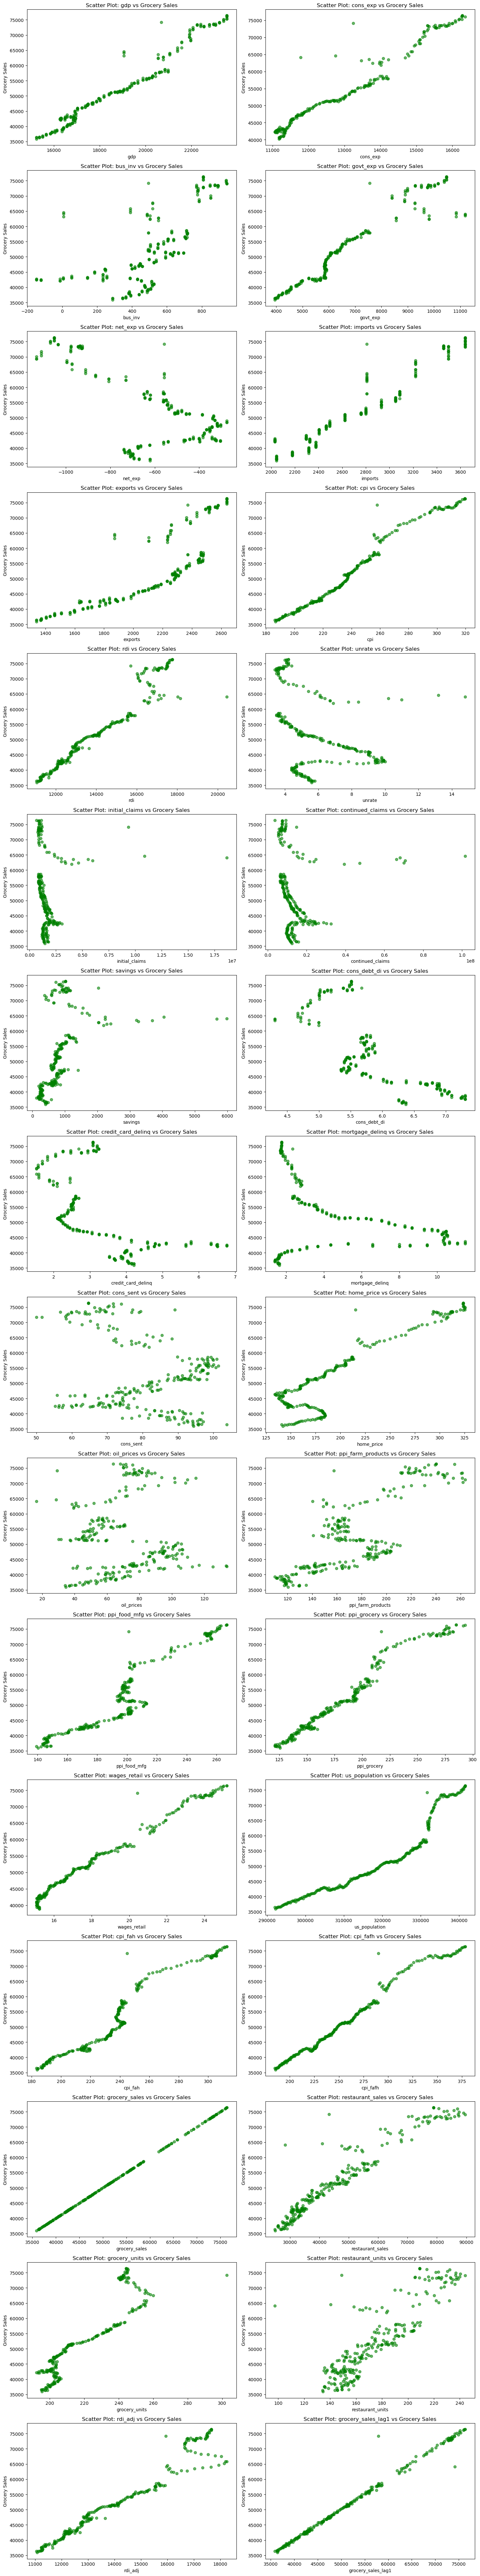

In [17]:
# Select independent variables (excluding index)
var_list = df.columns.tolist()  # Since 'date' is index, it's not included

# Create a grid of subplots (2 columns × enough rows for all variables)
num_vars = len(var_list)
rows = (num_vars // 2) + (num_vars % 2)  # Ensures enough rows for all variables

fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(15, 5 * rows))  # Dynamically sized

# Flatten axes array for easier iteration
axes = axes.flatten()

# Loop through each variable and create scatter plots
for i, col in enumerate(var_list):
    ax = axes[i]
    ax.scatter(df[col], df['grocery_sales'], color='green', alpha=0.6)
    ax.set_xlabel(col, fontsize=10)
    ax.set_ylabel('Grocery Sales', fontsize=10)
    ax.set_title(f'Scatter Plot: {col} vs Grocery Sales')

# Hide empty subplots if `var_list` has an odd number of elements
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and show all plots
plt.tight_layout()
plt.show()


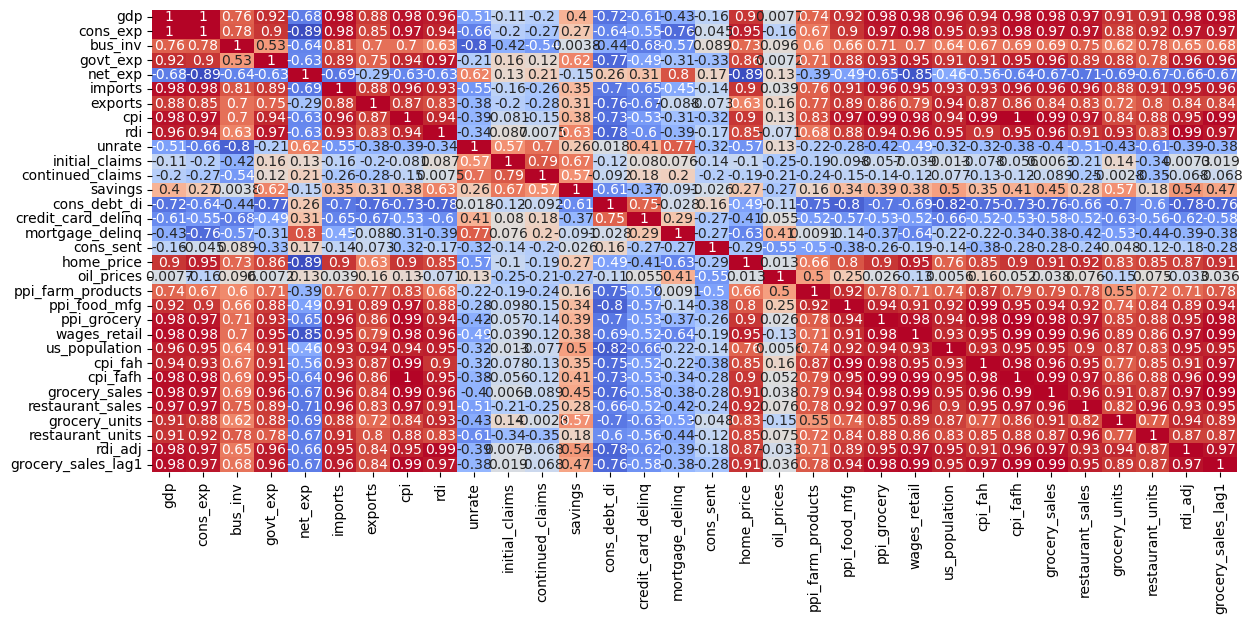

In [18]:
# Compute the correlation matrix
df_corr = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(14, 6))
sns.heatmap(df_corr, annot=True, cbar=False, cmap="coolwarm")
plt.show()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 256 entries, 2004-01-01 to 2025-04-01
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gdp                 256 non-null    float64
 1   cons_exp            220 non-null    float64
 2   bus_inv             256 non-null    float64
 3   govt_exp            256 non-null    float64
 4   net_exp             256 non-null    float64
 5   imports             256 non-null    float64
 6   exports             256 non-null    float64
 7   cpi                 256 non-null    float64
 8   rdi                 256 non-null    float64
 9   unrate              256 non-null    float64
 10  initial_claims      256 non-null    int64  
 11  continued_claims    256 non-null    int64  
 12  savings             256 non-null    float64
 13  cons_debt_di        256 non-null    float64
 14  credit_card_delinq  256 non-null    float64
 15  mortgage_delinq     256 non-null    fl

### Feature Creation ###

In [20]:
#feature creation

# Create first difference variables (applies to all numeric columns)
df_diff = df.diff().add_suffix('_diff')
df_diff = df_diff.bfill()

# Create YOY variables (applies to all numeric columns)
df_yoy = df.pct_change(periods=12, fill_method=None).add_suffix('_yoy') * 100  # Converts to percentage

# Create dummy1 for dates between 2/29/2020 and 4/30/2020. A boolean consition with a .astype(int) will return a 1 for True and 0 for false
df['covid1'] = ((df.index >= '2020-02-01') & (df.index <= '2020-04-01')).astype(int)

# Create dummy2 for dates between 5/31/2020 and 10/31/2020
df['covid2'] = ((df.index >= '2020-05-01') & (df.index <= '2020-10-01')).astype(int)

# reduce grocery sales for March 2020
df.loc[df.index == '2020-03-01', 'grocery_sales'] = 61000 

In [21]:
df = pd.concat([df, df_diff, df_yoy], axis=1)

In [22]:
for col in df.columns:
    print(col)

gdp
cons_exp
bus_inv
govt_exp
net_exp
imports
exports
cpi
rdi
unrate
initial_claims
continued_claims
savings
cons_debt_di
credit_card_delinq
mortgage_delinq
cons_sent
home_price
oil_prices
ppi_farm_products
ppi_food_mfg
ppi_grocery
wages_retail
us_population
cpi_fah
cpi_fafh
grocery_sales
restaurant_sales
grocery_units
restaurant_units
rdi_adj
grocery_sales_lag1
covid1
covid2
gdp_diff
cons_exp_diff
bus_inv_diff
govt_exp_diff
net_exp_diff
imports_diff
exports_diff
cpi_diff
rdi_diff
unrate_diff
initial_claims_diff
continued_claims_diff
savings_diff
cons_debt_di_diff
credit_card_delinq_diff
mortgage_delinq_diff
cons_sent_diff
home_price_diff
oil_prices_diff
ppi_farm_products_diff
ppi_food_mfg_diff
ppi_grocery_diff
wages_retail_diff
us_population_diff
cpi_fah_diff
cpi_fafh_diff
grocery_sales_diff
restaurant_sales_diff
grocery_units_diff
restaurant_units_diff
rdi_adj_diff
grocery_sales_lag1_diff
gdp_yoy
cons_exp_yoy
bus_inv_yoy
govt_exp_yoy
net_exp_yoy
imports_yoy
exports_yoy
cpi_yoy
rdi_yo

In [23]:
df.to_csv('grocery_eda_dataset.csv', index = True)